In [1]:
# Importing our libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 
import functools

# Sklearn all
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.2f' % x)
np.set_printoptions(suppress=True)

# Load data
data = pd.read_csv("churn_data.csv", sep=';')
data

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.10,110,89.00,9.87,10.00
1,0,107,1,1,3.70,1,161.60,123,82.00,9.78,13.70
2,0,137,1,0,0.00,0,243.40,114,52.00,6.06,12.20
3,0,84,0,0,0.00,2,299.40,71,57.00,3.10,6.60
4,0,75,0,0,0.00,3,166.70,113,41.00,7.42,10.10
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.20,77,71.70,10.78,9.90
3329,0,68,1,0,0.34,3,231.10,57,56.40,7.67,9.60
3330,0,28,1,0,0.00,2,180.80,109,56.00,14.44,14.10
3331,0,184,0,0,0.00,2,213.80,105,50.00,7.98,5.00


# Data Exploration

In [2]:
# Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [3]:
# Checking for missing values

total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])

missing_data

,Total,Percent
Churn,0,0.00
AccountWeeks,0,0.00
ContractRenewal,0,0.00
DataPlan,0,0.00
DataUsage,0,0.00
CustServCalls,0,0.00
DayMins,0,0.00
DayCalls,0,0.00
MonthlyCharge,0,0.00
OverageFee,0,0.00


In [4]:
# Check variable types
data.dtypes

Churn                int64
AccountWeeks         int64
ContractRenewal      int64
DataPlan             int64
DataUsage          float64
CustServCalls        int64
DayMins            float64
DayCalls             int64
MonthlyCharge      float64
OverageFee         float64
RoamMins           float64
dtype: object

We can see there is no null data neither categorical data in the dataset

In [5]:
# Get summary statistics
# from pandas_profiling import ProfileReport
# profile = ProfileReport(data, title="Report")
# profile

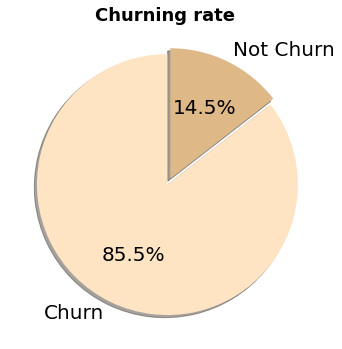

In [6]:
# Ploting the target 
labels = ['Churn', 'Not Churn']
sizes = data['Churn'].value_counts(sort = True)

colors = ["bisque","burlywood"]
explode = (0.05,0) 
 
plt.figure(figsize=(6,6))
plt.suptitle("Churning rate",y=0.9, size=18, weight='bold')
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, 
        startangle=90, textprops={"fontsize":20})
plt.show()

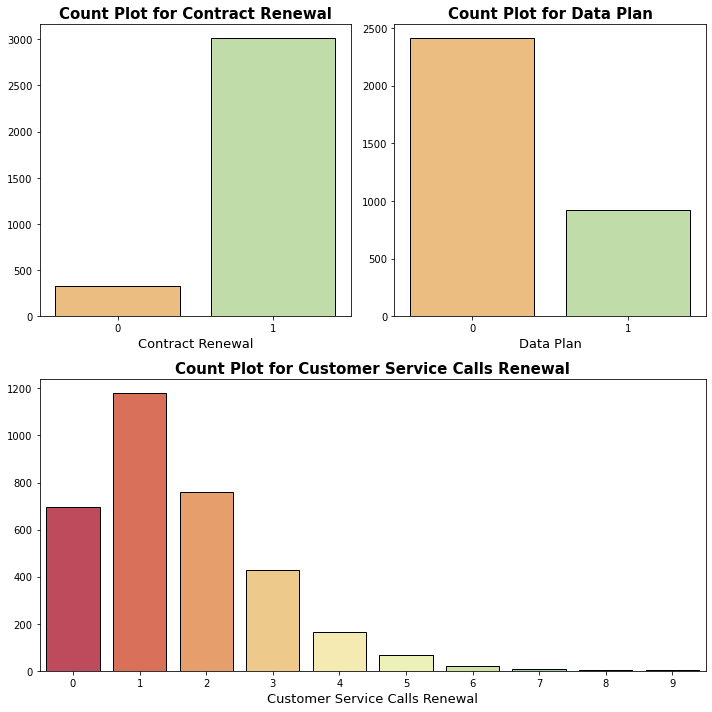

In [7]:
# Ploting other attributes
ax = plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(data = data , x = "ContractRenewal" , palette="Spectral", edgecolor='k')
plt.title("Count Plot for Contract Renewal" , size=15, fontweight='bold', fontfamily='sans')
plt.xlabel("Contract Renewal", size=13, fontweight='light', fontfamily='sans')
plt.ylabel('')
plt.subplot(2,2,2)
sns.countplot(data = data , x = "DataPlan" , palette="Spectral", edgecolor='k')
plt.title("Count Plot for Data Plan" , size=15, fontweight='bold', fontfamily='sans')
plt.xlabel("Data Plan", size=13, fontweight='light', fontfamily='sans')
plt.ylabel('')
plt.subplot(2,2,(3,4))
sns.countplot(data = data , x = "CustServCalls" , palette="Spectral", edgecolor='k')
plt.title("Count Plot for Customer Service Calls Renewal" , size=15, fontweight='bold', fontfamily='sans')
plt.xlabel("Customer Service Calls Renewal", size=13, fontweight='light', fontfamily='sans')
plt.ylabel('')
plt.tight_layout()
plt.show()

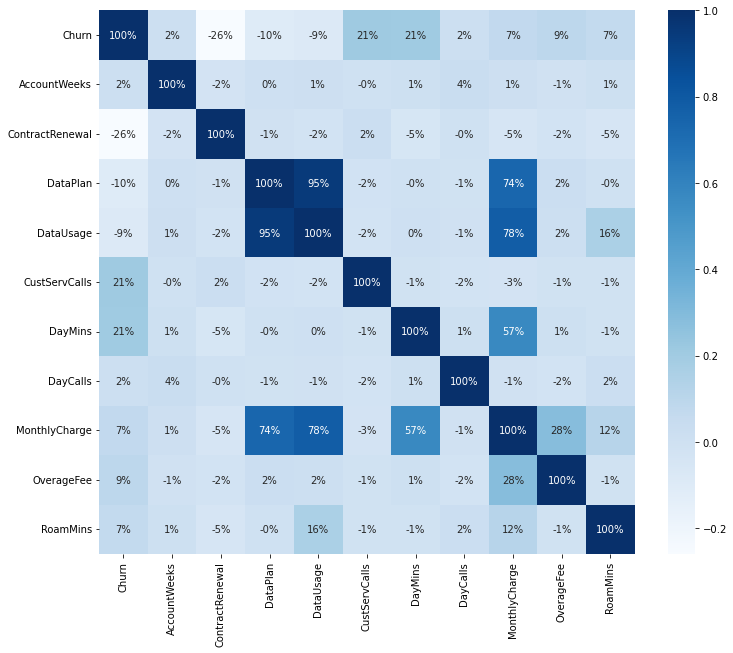

In [8]:
# Correlation map
ax = plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True,cmap="Blues", fmt='.0%')
plt.show()

In the previous correlation map we are able to see that the probability of churning is negatively correlated with DataUsage and positively correlated with all the other attributes (we are not considering Contract Renewal and Data Plan as they are dummy variables). We have analyzed their impact on churning hereafter.

We are also able to check that DataPlan and DataUsage are highly correlated attributes, and they are also correlated with MonthlyCharge.

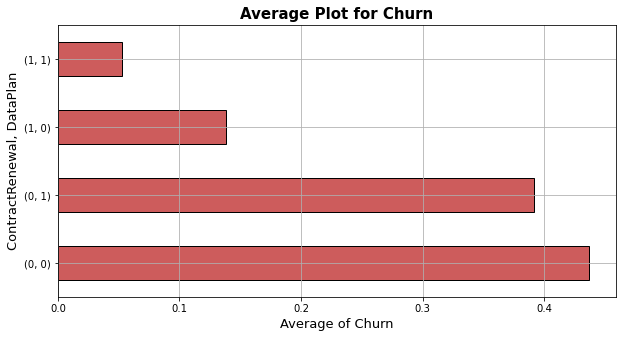

In [9]:
# Contract Renewal and Data Plan impact on Churning Probability
ax = plt.figure(figsize=(10,5))
data.groupby(['ContractRenewal',"DataPlan"])['Churn'].mean().plot(figsize=(10,5),kind="barh",color="indianred",
                                                               edgecolor='k')
plt.title("Average Plot for Churn" , size=15, fontweight='bold', fontfamily='sans')
plt.ylabel("ContractRenewal, DataPlan",size=13, fontweight='light', fontfamily='sans')
plt.xlabel("Average of Churn",size=13, fontweight='light', fontfamily='sans')
plt.grid(True)
plt.show()

Contract Renewal and Data Plan are two important attributes when trying to predict customer churn. If a customer has recently renewed a contract and has a data plan, the probability of churning is much more lower than if he/she has not. Moreover, we can also see that having renewed a contract recently has a higher impact on the churning rate than having a data plan.

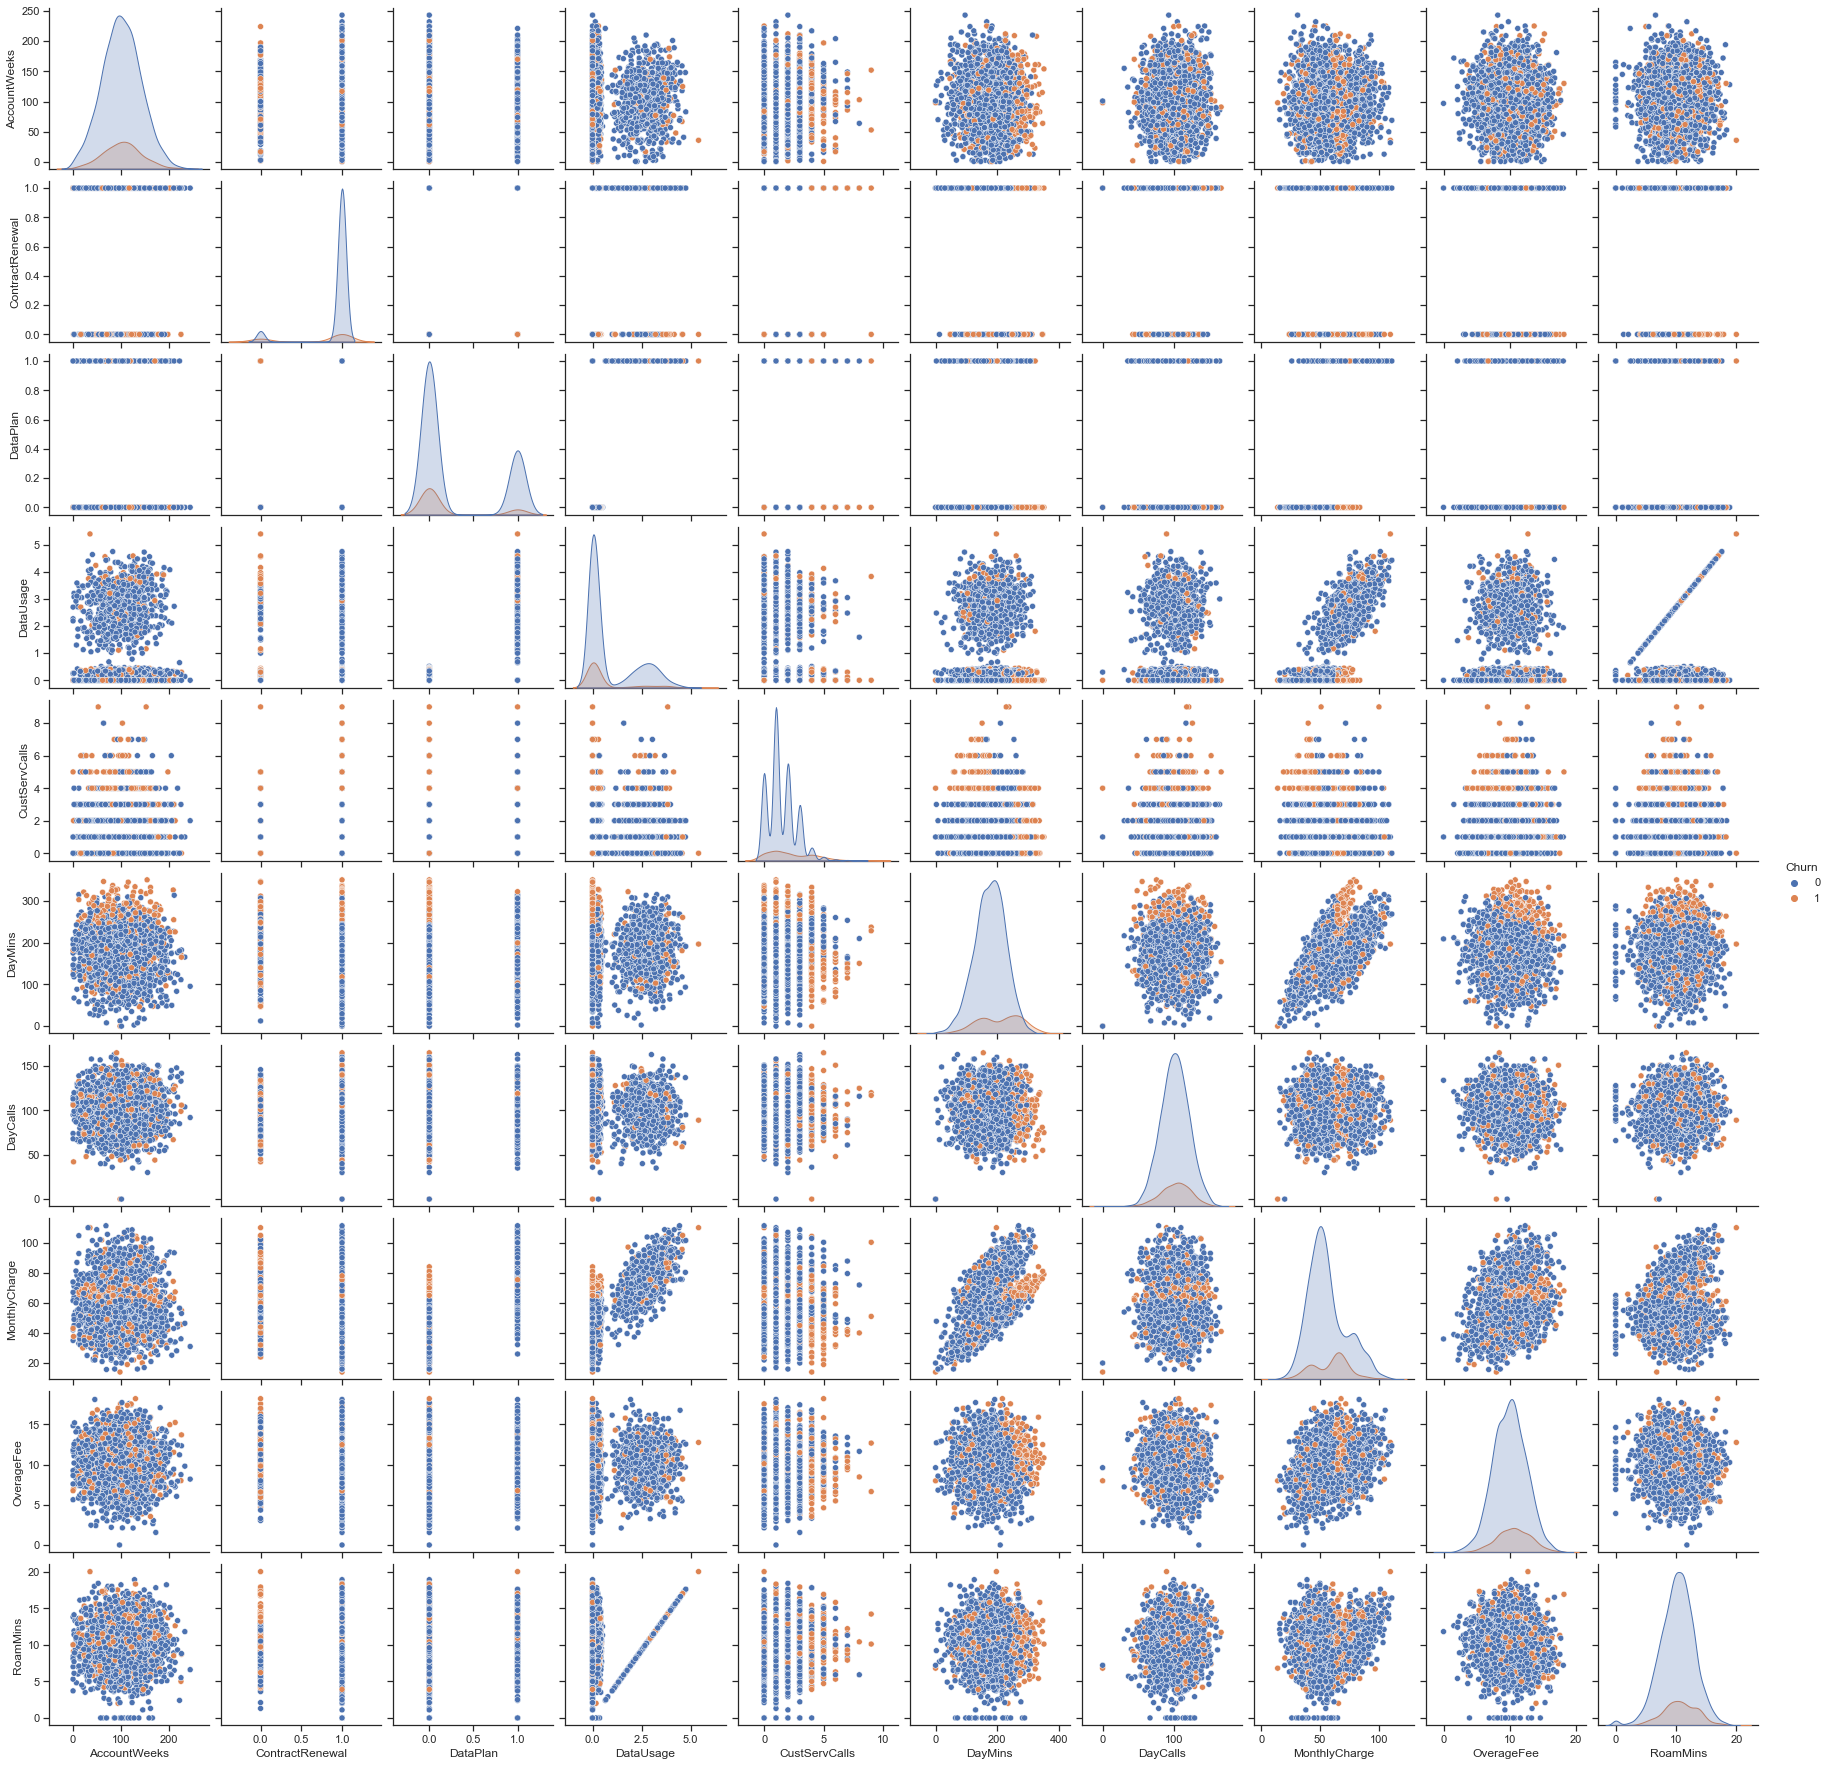

In [10]:
# Visualise the data
import seaborn as sns
sns.set(style = "ticks")
sns.pairplot(data, hue="Churn")

In [11]:
# Based on the graphical representation, it seems like a large share of people who churn have high DayMins and a high
# and a highe Charge fee. Thus we multiply the two. Note that these people are also more distributed on the right side
# of DayMins. Fortunately, DayMins has a bigger support which favours the variable

data['DayMinsXOverageFee'] = data['DayMins'] * data['OverageFee']
data['CusExp'] = data['CustServCalls'] * data['AccountWeeks']
data['ServiceExposure'] = data['AccountWeeks'] * data['DayMins']
data

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,DayMinsXOverageFee,CusExp,ServiceExposure
0,0,128,1,1,2.70,1,265.10,110,89.00,9.87,10.00,2616.54,128,33932.80
1,0,107,1,1,3.70,1,161.60,123,82.00,9.78,13.70,1580.45,107,17291.20
2,0,137,1,0,0.00,0,243.40,114,52.00,6.06,12.20,1475.00,0,33345.80
3,0,84,0,0,0.00,2,299.40,71,57.00,3.10,6.60,928.14,168,25149.60
4,0,75,0,0,0.00,3,166.70,113,41.00,7.42,10.10,1236.91,225,12502.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.20,77,71.70,10.78,9.90,1683.84,384,29990.40
3329,0,68,1,0,0.34,3,231.10,57,56.40,7.67,9.60,1772.54,204,15714.80
3330,0,28,1,0,0.00,2,180.80,109,56.00,14.44,14.10,2610.75,56,5062.40
3331,0,184,0,0,0.00,2,213.80,105,50.00,7.98,5.00,1706.12,368,39339.20


In [12]:
# Investigate outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print((Q1 - 1.5*IQR),(Q3 + 1.5*IQR))

Churn                    0.00
AccountWeeks            -5.50
ContractRenewal          1.00
DataPlan                -1.50
DataUsage               -2.67
CustServCalls           -0.50
DayMins                 34.65
DayCalls                46.50
MonthlyCharge           13.20
OverageFee               3.17
RoamMins                 3.10
DayMinsXOverageFee    -169.81
CusExp                -225.00
ServiceExposure      -7380.00
dtype: float64 Churn                    0.00
AccountWeeks           206.50
ContractRenewal          1.00
DataPlan                 2.50
DataUsage                4.45
CustServCalls            3.50
DayMins                325.45
DayCalls               154.50
MonthlyCharge           98.00
OverageFee              16.93
RoamMins                17.50
DayMinsXOverageFee    3712.17
CusExp                 503.00
ServiceExposure      42719.20
dtype: float64


# Models

In [13]:
# Bring the data in an appropriate form
X = data.drop('Churn', axis = 1)
y = data['Churn']

# Split data for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [14]:
# Checking if the test train samples are balanced
print(y_train.mean(), y_test.mean())

0.14599193909538738 0.14272727272727273


### CLASSIFICATION TREE

In [15]:
clf = DecisionTreeClassifier()
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [16]:
clf = clf.fit(X_train, y_train)
predictions1 = clf.predict(X_test)
predictions1

print("Accuracy Score: {:.2f}".format(accuracy_score(y_test, predictions1)))
print("Precision Score: {:.2f}".format(precision_score(y_test, predictions1)))
print("F1 Score: {:.2f}".format(f1_score(y_test, predictions1)))

Accuracy Score: 0.89
Precision Score: 0.59
F1 Score: 0.61


Text(66.5, 0.5, 'True')

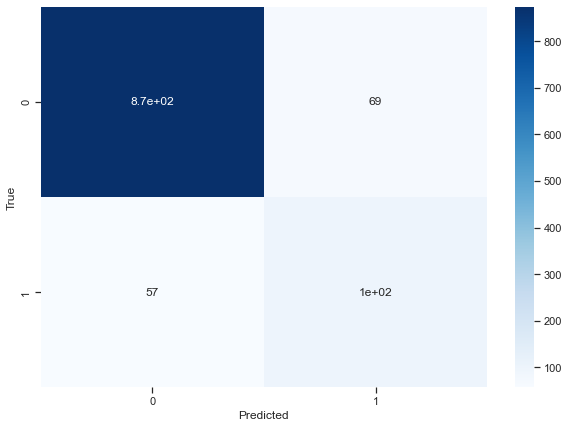

In [17]:
cm1 = confusion_matrix(y_test, predictions1, labels=[0,1])
plt.figure(figsize=(10,7))
sns.heatmap(cm1, cmap="Blues", annot = True)
plt.xlabel('Predicted')
plt.ylabel('True')

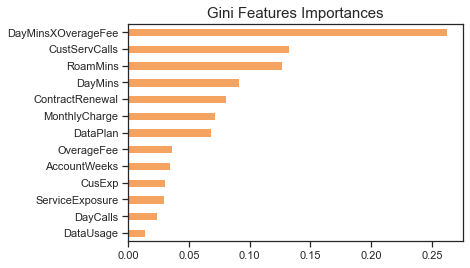

In [18]:
clf.feature_importances_
features = ['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins', 'DayMinsXOverageFee', 'CusExp', 'ServiceExposure']
importances_clf = pd.Series(data=clf.feature_importances_,
                        index= features)
 
# Sort importances
importances_sorted_clf = importances_clf.sort_values()
 
# Draw a horizontal barplot of importances_sorted
importances_sorted_clf.plot(kind='barh', color='sandybrown')
plt.title('Gini Features Importances', size=15)
plt.show()

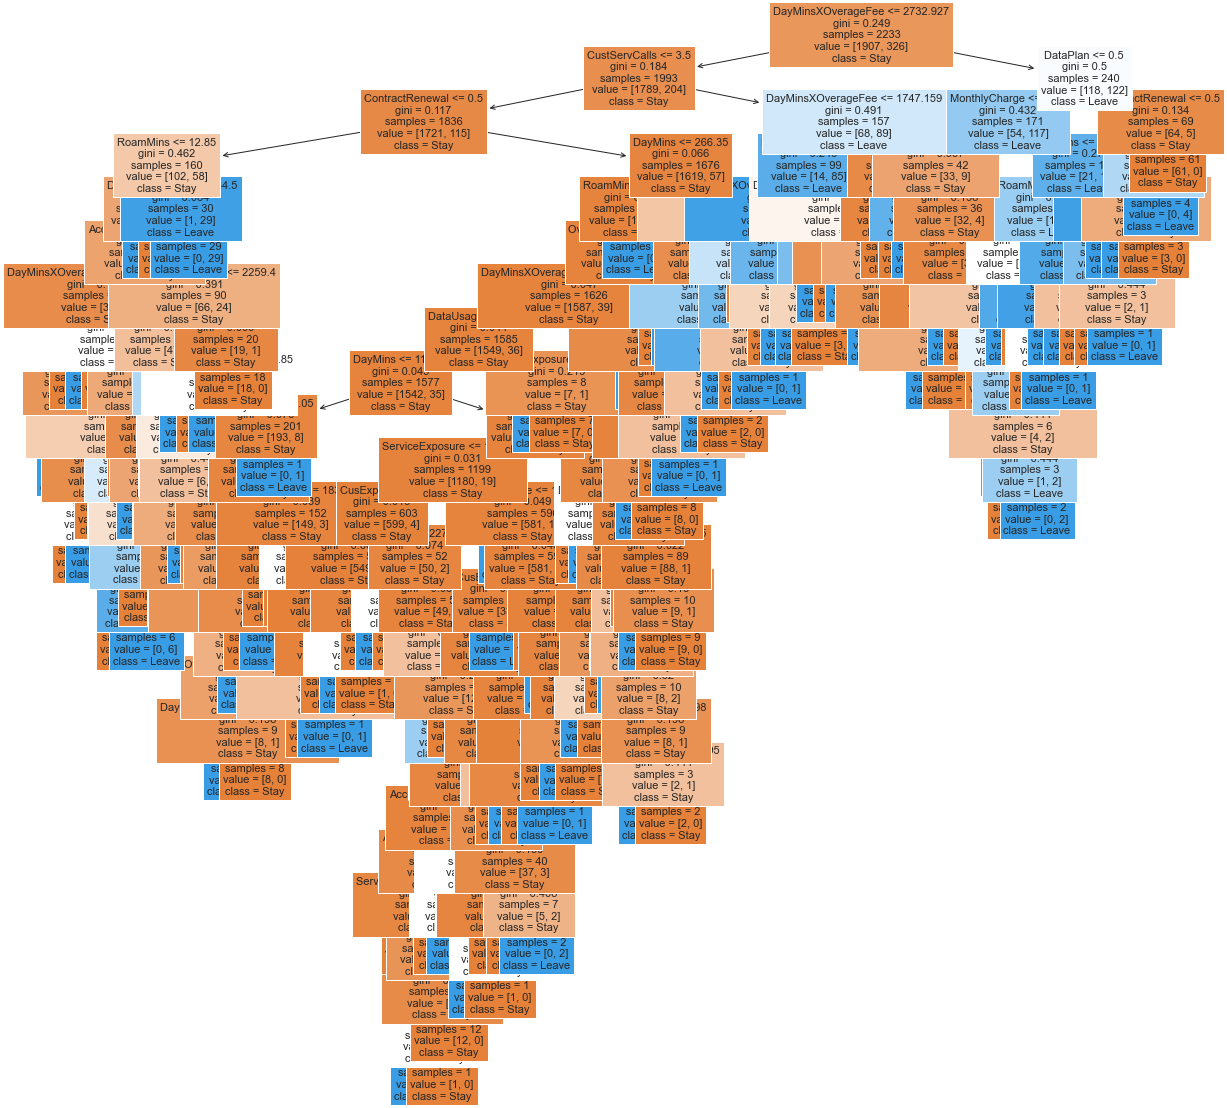

In [19]:
from sklearn import tree
fig1 = plt.figure(figsize=(20,20))
fig1 = tree.plot_tree(clf,
                   feature_names = X.columns,
                   class_names = {0: 'Stay', 1: 'Leave'},
                   filled = True,
                   fontsize = 11
                  )

In [20]:
## Parameter Tuning ##

In [21]:
# Write a global function to tune the hyper parapeters of the model

def tuning(model, param):
    rdm_search = RandomizedSearchCV(model, param_distributions=param, n_iter=10, scoring='accuracy', n_jobs=-1, cv=5, verbose=3, random_state=420)
    rdm_search.fit(X_train, y_train)
    return rdm_search.best_params_

In [22]:
# Finding the best hyperparameters for the classification tree
parameters_tree = {
 "max_depth"        : [4, 5, 6, 7, 8, 9, 10, 11, 12],  
 "criterion"        : ['gini', 'entropy'],
 "max_features"     : [4, 5, 6, 7, 8, 9, 10, 11, 12],
}

tuning(clf, parameters_tree)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'max_features': 10, 'max_depth': 6, 'criterion': 'gini'}

In [50]:
# Apply best parameters
clf2 = DecisionTreeClassifier(max_features = 10, max_depth = 6, criterion = 'gini')
clf2 = clf2.fit(X_train, y_train)
predictions_tree = clf2.predict(X_test)

print("Accuracy Score: {:.2f}".format(accuracy_score(y_test, predictions_tree)))
print("Precision Score: {:.2f}".format(precision_score(y_test, predictions_tree)))
print("F1 Score: {:.2f}".format(f1_score(y_test, predictions_tree)))

Accuracy Score: 0.92
Precision Score: 0.80
F1 Score: 0.69


Text(66.5, 0.5, 'True')

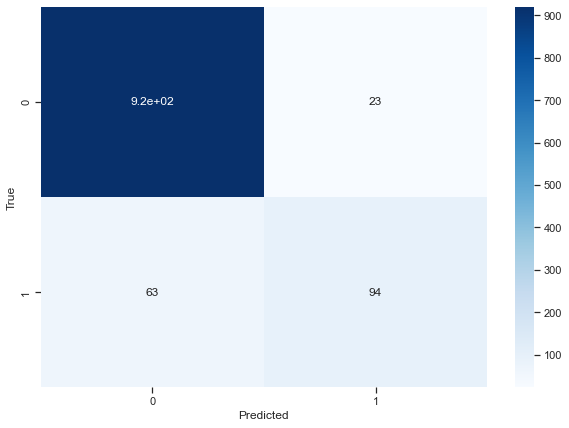

In [51]:
cm_tree = confusion_matrix(y_test, predictions_tree, labels=[0,1])
plt.figure(figsize=(10,7))
sns.heatmap(cm_tree, cmap="Blues", annot = True)
plt.xlabel('Predicted')
plt.ylabel('True')

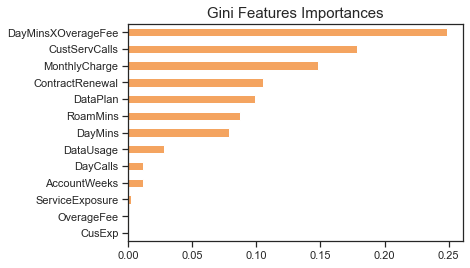

In [52]:
clf2.feature_importances_
features = ['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins', 'DayMinsXOverageFee', 'CusExp', 'ServiceExposure']
importances_clf2 = pd.Series(data=clf2.feature_importances_,
                        index= features)
 
# Sort importances
importances_sorted_clf2 = importances_clf2.sort_values()
 
# Draw a horizontal barplot of importances_sorted
importances_sorted_clf2.plot(kind='barh', color='sandybrown')
plt.title('Gini Features Importances', size=15)
plt.show()

### RANDOM FOREST

In [26]:
# Create random forest classifer object
rf = RandomForestClassifier(random_state=1)

# Train Random Forest Classifer
rf = rf.fit(X_train, y_train)

#Predict the response for test dataset
predictions2 = rf.predict(X_test)

print("Accuracy Score: {:.2f}".format(accuracy_score(y_test, predictions2)))
print("Precision Score: {:.2f}".format(precision_score(y_test, predictions2)))
print("F1 Score: {:.2f}".format(f1_score(y_test, predictions2)))

Accuracy Score: 0.94
Precision Score: 0.86
F1 Score: 0.74


Text(66.5, 0.5, 'True')

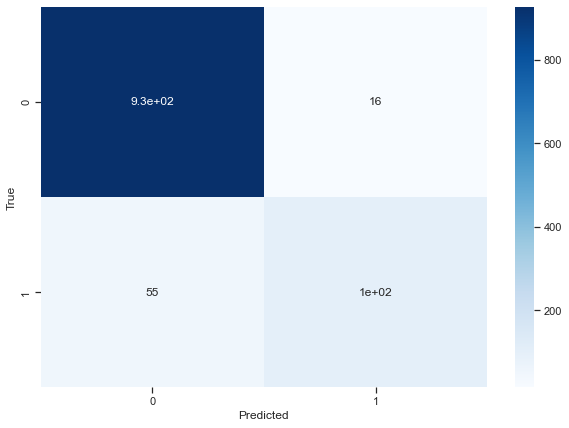

In [27]:
cm2 = confusion_matrix(y_test, predictions2, labels=[0,1])
plt.figure(figsize=(10,7))
sns.heatmap(cm2, cmap="Blues", annot = True)
plt.xlabel('Predicted')
plt.ylabel('True')

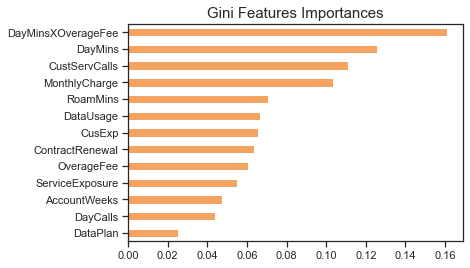

In [28]:
rf.feature_importances_
features = ['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins', 'DayMinsXOverageFee', 'CusExp', 'ServiceExposure']
importances_rf = pd.Series(data=rf.feature_importances_,
                        index= features)
 
# Sort importances
importances_sorted_rf = importances_rf.sort_values()
 
# Draw a horizontal barplot of importances_sorted
importances_sorted_rf.plot(kind='barh', color='sandybrown')
plt.title('Gini Features Importances', size=15)
plt.show()

In [29]:
## Parameter Tuning ##

In [30]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [31]:
parameters_forest = {
    "criterion" : ['gini', 'entropy'],
    "max_depth" : [4, 5, 6, 7, 8, 9, 10, 11, 12],
    "max_features" : ['auto', 'log2', 'sqrt'],
    "min_samples_split" : [2, 4, 6, 8, 10]
}

tuning(rf, parameters_forest)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'min_samples_split': 8,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'entropy'}

In [32]:
rf2 = RandomForestClassifier(random_state=1, min_samples_split=8, max_features='sqrt', max_depth=10, criterion='entropy')
rf2 = rf2.fit(X_train, y_train)
predictions_forest = rf2.predict(X_test)

print("Accuracy Score: {:.2f}".format(accuracy_score(y_test, predictions_forest)))
print("Precision Score: {:.2f}".format(precision_score(y_test, predictions_forest)))


Accuracy Score: 0.94
Precision Score: 0.90


Text(66.5, 0.5, 'True')

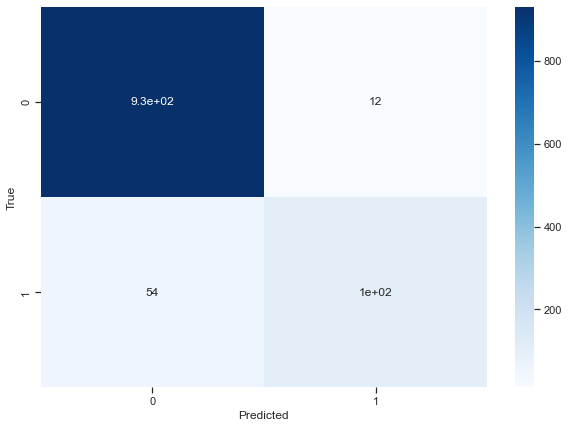

In [33]:
cm_forest = confusion_matrix(y_test, predictions_forest, labels=[0,1])
plt.figure(figsize=(10,7))
sns.heatmap(cm_forest, cmap="Blues", annot = True)
plt.xlabel('Predicted')
plt.ylabel('True')

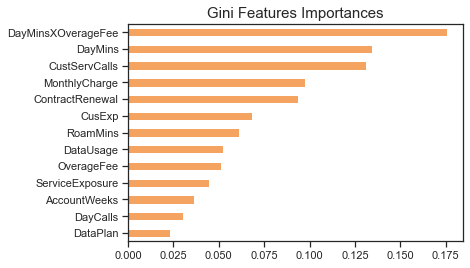

In [34]:
rf2.feature_importances_
features = ['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins', 'DayMinsXOverageFee', 'CusExp', 'ServiceExposure']
importances_rf2 = pd.Series(data=rf2.feature_importances_,
                        index= features)
 
# Sort importances
importances_sorted_rf2 = importances_rf2.sort_values()
 
# Draw a horizontal barplot of importances_sorted
importances_sorted_rf2.plot(kind='barh', color='sandybrown')
plt.title('Gini Features Importances', size=15)
plt.show()

### ADA BOOST

In [35]:
# Create adaboost classifer object
ada = AdaBoostClassifier()

# Train Adaboost Classifer
model_adaboost = ada.fit(X_train, y_train)

#Predict the response for test dataset
predictions3 = ada.predict(X_test)
 
# Evaluate acc_test
print("Accuracy Score: {:.2f}".format(accuracy_score(y_test, predictions3)))
print("Precision Score: {:.2f}".format(precision_score(y_test, predictions3)))
print("F1 Score: {:.2f}".format(f1_score(y_test, predictions3)))

Accuracy Score: 0.90
Precision Score: 0.70
F1 Score: 0.57


Text(66.5, 0.5, 'True')

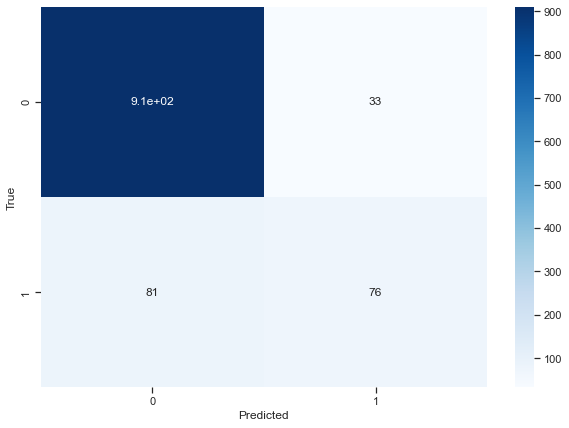

In [36]:
cm3 = confusion_matrix(y_test, predictions3, labels=[0,1])
plt.figure(figsize=(10,7))
sns.heatmap(cm3, cmap="Blues", annot = True)
plt.xlabel('Predicted')
plt.ylabel('True')

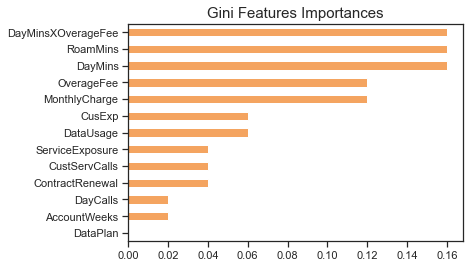

In [37]:
ada.feature_importances_
features = ['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins', 'DayMinsXOverageFee', 'CusExp', 'ServiceExposure']
importances_ada = pd.Series(data=ada.feature_importances_,
                        index= features)
 
# Sort importances
importances_sorted_ada = importances_ada.sort_values()
 
# Draw a horizontal barplot of importances_sorted
importances_sorted_ada.plot(kind='barh', color='sandybrown')
plt.title('Gini Features Importances', size=15)
plt.show()

In [38]:
ada.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [39]:
parameters_ada = {
    "n_estimators" : [10,20,50, 100, 300,500],
    "learning_rate": [0.0001, 0.01, 0.1, 1.0, 1.1, 1.2]}

tuning(ada, parameters_ada)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_estimators': 50, 'learning_rate': 1.2}

In [40]:
ada2 = AdaBoostClassifier(n_estimators=50, learning_rate=1.2)
ada2 = ada2.fit(X_train, y_train)
predictions_ada = ada2.predict(X_test)

print("Accuracy Score: {:.2f}".format(accuracy_score(y_test, predictions_ada)))
print("Precision Score: {:.2f}".format(precision_score(y_test, predictions_ada)))
print("F1 Score: {:.2f}".format(f1_score(y_test, predictions_ada)))

Accuracy Score: 0.89
Precision Score: 0.64
F1 Score: 0.56


Text(66.5, 0.5, 'True')

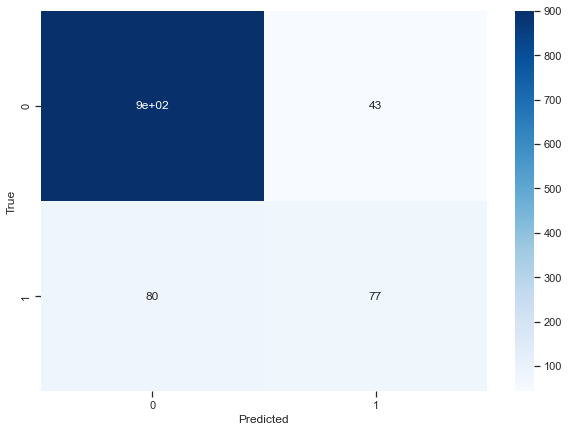

In [41]:
cm_ada = confusion_matrix(y_test, predictions_ada, labels=[0,1])
plt.figure(figsize=(10,7))
sns.heatmap(cm_ada, cmap="Blues", annot = True)
plt.xlabel('Predicted')
plt.ylabel('True')

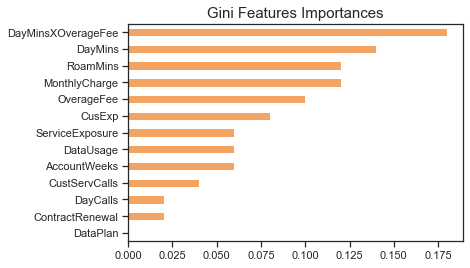

In [42]:
ada2.feature_importances_
features = ['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins', 'DayMinsXOverageFee', 'CusExp', 'ServiceExposure']
importances_ada2 = pd.Series(data=ada2.feature_importances_,
                        index= features)
 
# Sort importances
importances_sorted_ada2 = importances_ada2.sort_values()
 
# Draw a horizontal barplot of importances_sorted
importances_sorted_ada2.plot(kind='barh', color='sandybrown')
plt.title('Gini Features Importances', size=15)
plt.show()

### XGBoost 

In [43]:
xgb = XGBClassifier(random_state=1)

# Estimate the XGBoost Model
xgb.fit(X_train, y_train)
predictions4 = xgb.predict(X_test)

# Get model evaluation
print("Accuracy Score: {:.2f}".format(accuracy_score(y_test, predictions4)))
print("Precision Score: {:.2f}".format(precision_score(y_test, predictions4)))
print("F1 Score: {:.2f}".format(f1_score(y_test, predictions4)))

Accuracy Score: 0.93
Precision Score: 0.85
F1 Score: 0.74


Text(66.5, 0.5, 'True')

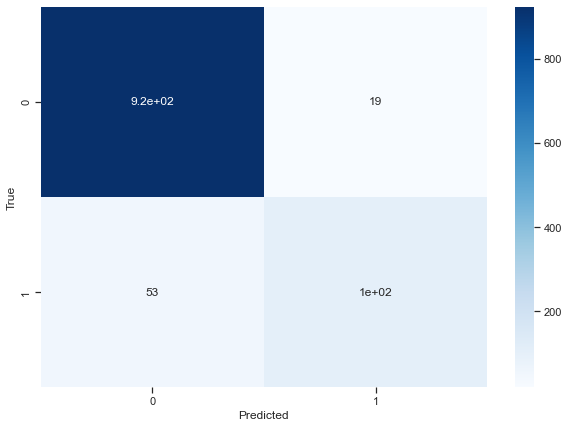

In [44]:
cm4 = confusion_matrix(y_test, predictions4, labels=[0,1])
plt.figure(figsize=(10,7))
sns.heatmap(cm4, cmap="Blues", annot = True)
plt.xlabel('Predicted')
plt.ylabel('True')

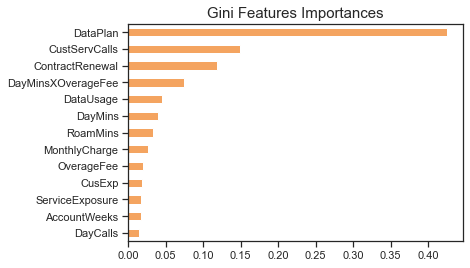

In [45]:
xgb.feature_importances_
features = ['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins', 'DayMinsXOverageFee', 'CusExp', 'ServiceExposure']
importances_xgb = pd.Series(data=xgb.feature_importances_,
                        index= features)
 
# Sort importances
importances_sorted_xgb = importances_xgb.sort_values()
 
# Draw a horizontal barplot of importances_sorted
importances_sorted_xgb.plot(kind='barh', color='sandybrown')
plt.title('Gini Features Importances', size=15)
plt.show()

In [46]:
parameters_xgb = {
 "max_depth"        : [4, 5, 6, 7, 8, 9, 10, 11, 12],  
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25] ,
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]}

tuning(xgb, parameters_xgb)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'max_depth': 4, 'learning_rate': 0.05, 'gamma': 0.0, 'colsample_bytree': 0.7}

In [47]:
# Now we restimate the the xgboost model with the parameters above
xgb2  = XGBClassifier(random_state=1, max_depth=4, learning_rate = 0.05, gamma=0.0, colsample_bytree = 0.7)
xgb2.fit(X_train, y_train)
predictions_xgb = xgb2.predict(X_test)

# Get model evaluation
print("Accuracy Score: {:.2f}".format(accuracy_score(y_test, predictions_xgb)))
print("Precision Score: {:.2f}".format(precision_score(y_test, predictions_xgb)))
print("F1 Score: {:.2f}".format(f1_score(y_test, predictions_xgb)))

Accuracy Score: 0.94
Precision Score: 0.87
F1 Score: 0.76


Text(66.5, 0.5, 'True')

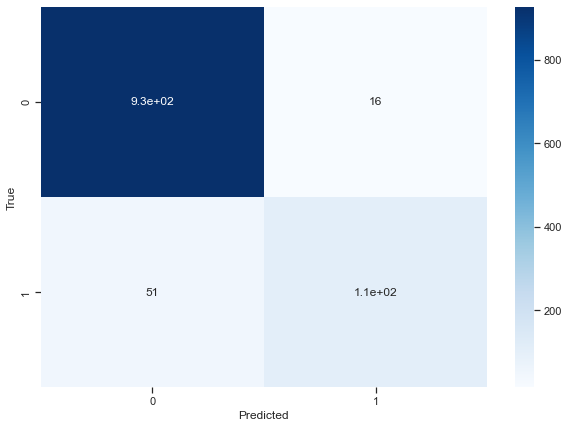

In [48]:
cm_xgb = confusion_matrix(y_test, predictions_xgb, labels=[0,1])
plt.figure(figsize=(10,7))
sns.heatmap(cm_xgb, cmap="Blues", annot = True)
plt.xlabel('Predicted')
plt.ylabel('True')

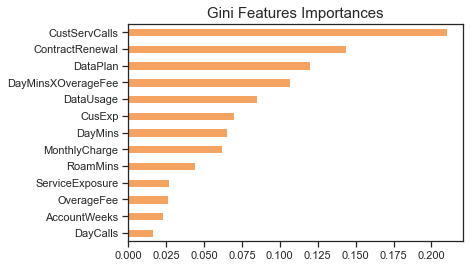

In [49]:
xgb2.feature_importances_
features = ['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins', 'DayMinsXOverageFee', 'CusExp', 'ServiceExposure']
importances_xgb2 = pd.Series(data=xgb2.feature_importances_,
                        index= features)
 
# Sort importances
importances_sorted_xgb2 = importances_xgb2.sort_values()
 
# Draw a horizontal barplot of importances_sorted
importances_sorted_xgb2.plot(kind='barh', color='sandybrown')
plt.title('Gini Features Importances', size=15)
plt.show()